In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [53]:
measurments_df = pd.read_csv('measurements.csv')

In [54]:
columns_to_keep = ['school_name', 'download_speed', 'upload_speed', 'latency', 'country']
filtered_df = measurments_df[columns_to_keep]
print(filtered_df.head())

                                         school_name  download_speed  \
0                                         Letlhabile            9.48   
1                        Carapichaima East Secondary            6.79   
2  КГУ "Общеобразовательная средняя школа №39 име...            0.18   
3                                St Joseph Secondary           27.56   
4                   St. Augustine Girls' High School           55.36   

   upload_speed  latency              country  
0          8.92       23             Botswana  
1         13.23      103  Trinidad and Tobago  
2          0.42      313           Kazakhstan  
3         18.04      118  Trinidad and Tobago  
4          5.01      160  Trinidad and Tobago  


In [55]:
countries_to_filter = ['Kazakhstan','Sri Lanka','Bosnia and Herzegovina','Saint Vincent and the Grenadines','Mongolia','Fiji','Uzbekistan','Botswana','Namibia','Kenya','Rwanda']
filtered_rows = filtered_df[filtered_df['country'].isin(countries_to_filter)]
print(filtered_rows.head())

                                         school_name  download_speed  \
0                                         Letlhabile            9.48   
2  КГУ "Общеобразовательная средняя школа №39 име...            0.18   
5                                    Solomon Dihutso          101.87   
6                                             Sekoma           17.61   
7                          9,Khujayli,Karakalpakstan           27.02   

   upload_speed  latency     country  
0          8.92       23    Botswana  
2          0.42      313  Kazakhstan  
5         89.67       10    Botswana  
6         19.59       39    Botswana  
7         25.70      244  Uzbekistan  


In [56]:
num = len(filtered_rows)
print(f"Number of entries after filtering: {num}")

Number of entries after filtering: 552850


In [57]:
print(filtered_rows.info())
print(filtered_rows.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 552850 entries, 0 to 566879
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   school_name     552850 non-null  object 
 1   download_speed  552843 non-null  float64
 2   upload_speed    552850 non-null  float64
 3   latency         552850 non-null  int64  
 4   country         552850 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 25.3+ MB
None
school_name       0
download_speed    7
upload_speed      0
latency           0
country           0
dtype: int64


In [58]:
filtered_rows = filtered_rows.dropna(subset=['download_speed'])
print(filtered_rows.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 552843 entries, 0 to 566879
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   school_name     552843 non-null  object 
 1   download_speed  552843 non-null  float64
 2   upload_speed    552843 non-null  float64
 3   latency         552843 non-null  int64  
 4   country         552843 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 25.3+ MB
None


In [59]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [63]:
hdi_df = pd.read_excel('CleanedHdi.xlsx')

In [67]:
print(hdi_df.head())

                          Countries  Human Development Index (HDI)   \
0                        Kazakhstan                           0.802   
1                         Sri Lanka                           0.780   
2            Bosnia and Herzegovina                           0.779   
3  Saint Vincent and the Grenadines                           0.772   
4                          Mongolia                           0.741   

   Gross national income (GNI) per capita  HDI rank  
0                             22586.79889        65  
1                             11899.49847        76  
2                             16571.41275        77  
3                             14049.14799        80  
4                             10350.86141        99  


In [79]:
hdi_df.rename(columns={'Countries': 'country'}, inplace=True)
print(hdi_df.head())


                            country  Human Development Index (HDI)   \
0                        Kazakhstan                           0.802   
1                         Sri Lanka                           0.780   
2            Bosnia and Herzegovina                           0.779   
3  Saint Vincent and the Grenadines                           0.772   
4                          Mongolia                           0.741   

   Gross national income (GNI) per capita  HDI rank  
0                             22586.79889        65  
1                             11899.49847        76  
2                             16571.41275        77  
3                             14049.14799        80  
4                             10350.86141        99  


In [80]:
merged_df = pd.merge(filtered_rows, hdi_df, on='country', how='inner')
print(merged_df.head())


       school_name  download_speed  upload_speed  latency   country  \
0       Letlhabile            9.48          8.92       23  Botswana   
1  Solomon Dihutso          101.87         89.67       10  Botswana   
2           Sekoma           17.61         19.59       39  Botswana   
3        Kumakwane          146.76        162.07       16  Botswana   
4         Moamogwe          111.44         96.18       11  Botswana   

   Human Development Index (HDI)   Gross national income (GNI) per capita  \
0                           0.708                             14841.57836   
1                           0.708                             14841.57836   
2                           0.708                             14841.57836   
3                           0.708                             14841.57836   
4                           0.708                             14841.57836   

   HDI rank  
0       124  
1       124  
2       124  
3       124  
4       124  


In [85]:
print(merged_df.columns)


Index(['school_name', 'download_speed', 'upload_speed', 'latency', 'country',
       'Human Development Index (HDI) ',
       'Gross national income (GNI) per capita', 'HDI rank'],
      dtype='object')


In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

merged_df[['download_speed', 'upload_speed', 'latency', 
           'Human Development Index (HDI) ', 
           'Gross national income (GNI) per capita',
           'HDI rank']] = scaler.fit_transform(
    merged_df[['download_speed', 'upload_speed', 'latency', 
               'Human Development Index (HDI) ', 
               'Gross national income (GNI) per capita',
               'HDI rank']]
)

In [88]:
# priority score
merged_df['priority_score'] = (
    (1 - merged_df['Human Development Index (HDI) ']) * 0.4 +  # Low HDI = higher priority
    (1 - merged_df['download_speed']) * 0.2 +                 # Low download speed = higher priority
    (1 - merged_df['upload_speed']) * 0.2 +                   # Low upload speed = higher priority
    merged_df['latency'] * 0.2                                # High latency = higher priority
)

merged_df = merged_df.sort_values(by='priority_score', ascending=False)


print(merged_df[['school_name', 'country', 'priority_score']].head())

                           school_name  country  priority_score
431493           PALOTAKA REFUGEE CAMP    Kenya        0.909267
514036  Sauyemwa Junior Primary School  Namibia        0.895112
512911          Rucara Combined School  Namibia        0.895088
426851                  EFA Nyagahanga   Rwanda        0.892747
514034  Sauyemwa Junior Primary School  Namibia        0.795303


In [89]:
high_priority = merged_df[merged_df['priority_score'] > 0.7]
print(high_priority[['school_name', 'country', 'priority_score']])


                           school_name  country  priority_score
431493           PALOTAKA REFUGEE CAMP    Kenya        0.909267
514036  Sauyemwa Junior Primary School  Namibia        0.895112
512911          Rucara Combined School  Namibia        0.895088
426851                  EFA Nyagahanga   Rwanda        0.892747
514034  Sauyemwa Junior Primary School  Namibia        0.795303
...                                ...      ...             ...
429730                          TIGONI    Kenya        0.700334
429657                          TIGONI    Kenya        0.700249
430612                          TIGONI    Kenya        0.700132
429879                          TIGONI    Kenya        0.700118
431596                          TIGONI    Kenya        0.700060

[9768 rows x 3 columns]


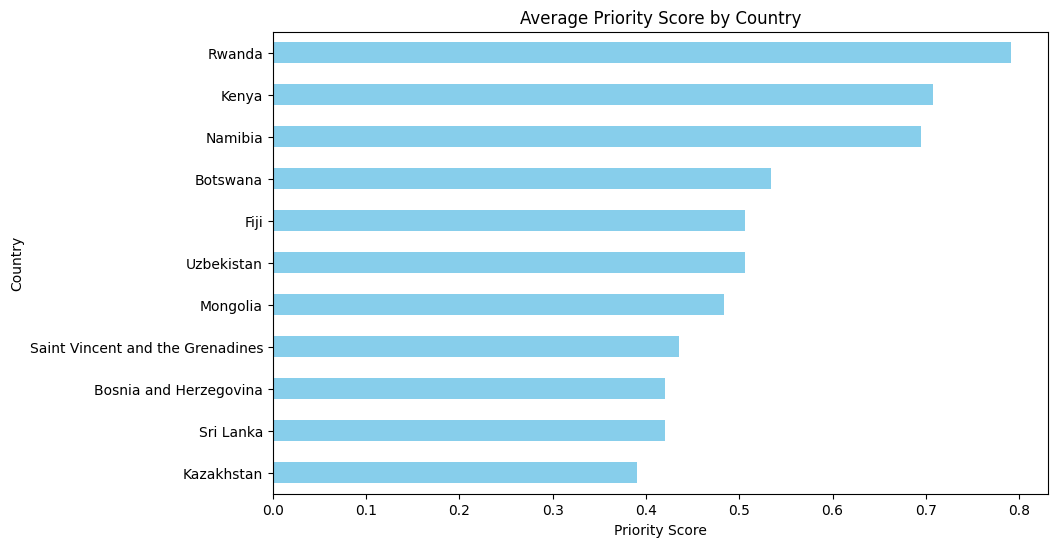

In [90]:
avg_priority_by_country = merged_df.groupby('country')['priority_score'].mean()

avg_priority_by_country.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Average Priority Score by Country')
plt.xlabel('Priority Score')
plt.ylabel('Country')
plt.show()


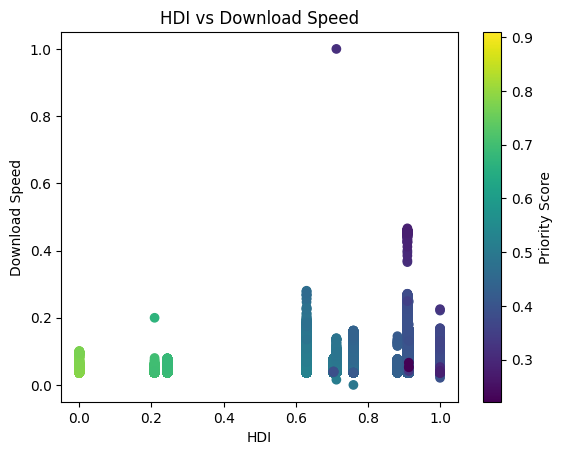

In [91]:
plt.scatter(merged_df['Human Development Index (HDI) '], merged_df['download_speed'], 
            c=merged_df['priority_score'], cmap='viridis')
plt.colorbar(label='Priority Score')
plt.title('HDI vs Download Speed')
plt.xlabel('HDI')
plt.ylabel('Download Speed')
plt.show()


In [93]:
summary = merged_df.groupby('country').agg({
    'download_speed': 'mean',
    'upload_speed': 'mean',
    'latency': 'mean',
    'Human Development Index (HDI) ': 'mean',
    'priority_score': 'mean'
})
print(summary)


                                  download_speed  upload_speed   latency  \
country                                                                    
Bosnia and Herzegovina                  0.070126      0.008072  0.001067   
Botswana                                0.057127      0.014609  0.000197   
Fiji                                    0.042442      0.002468  0.000387   
Kazakhstan                              0.043877      0.005450  0.000218   
Kenya                                   0.039739      0.004271  0.000293   
Mongolia                                0.050669      0.010066  0.000232   
Namibia                                 0.038626      0.001148  0.000914   
Rwanda                                  0.041130      0.003186  0.000111   
Saint Vincent and the Grenadines        0.049587      0.007988  0.000027   
Sri Lanka                               0.061598      0.011479  0.000147   
Uzbekistan                              0.050957      0.010356  0.000162   

           